# THnSparse Tutorial: A look at the most useful data structure  in ROOT

### What is a THnSparse?
A **THnSparse** is a multi-dimensional histogram in ROOT (usually 4 or more dimensions, though you can technically build 1, 2, and 3D sparses). The name "sparse" comes from the idea that the histogram should be SPARSELY populated (i.e. many bins with zero content) as it will only allocate memory for bins with non-zero conent.

### What is it good for?
**THnSparse** is a convenient tool for seeing how changing ranges in one or multiple variables affects the main distribution you are interested in. For example, if you had a 4-D THnSparse that had a Pt, Phi, Eta and P axis, you could see how the Pt distribution changes as you change the Eta ranges, or how the Phi distribution changes as you change the P and Eta ranges, all using only a few lines of code!!

### Why would I use anything else?
**THnSparse**s are extremely useful, but there are obvious limitations. If you just want to make a Pt distribution, you should use a TH1D as very few bins would have zero conent. If you have 8 variables you're intested in, you can't just make an 8-D THnSparse willy-nilly. Every axis you add to the histogram adds a considerable amount of memory (each bin on the new axis can be thought of as a new histogram with the original dimensions). This is something you need to consider heavily while running code online and merging, as you're dealing with a **LOT** of data!!|

## So how do you use them??

In [1]:
# must import ROOT to use ROOT in python
import ROOT as rt

from array import array
from random import randint

Welcome to JupyROOT 6.18/04


In [2]:
# this is the canvas we will be using the whole time
canvas = rt.TCanvas("main_canvas")

#### Time to make a 5-D THnSparse. First we need to declare some arrays:

In [3]:
test_bins = array('i', [5, 10, 10, 100, 20])
test_mins = array('d', [0, -2, -2, 0, -5])
test_maxes = array('d', [10, 2, 2, 20, 5])

# for the curious, a python list and a C array are different, and the "array" module in python helps sort this out.
# the first argument is the type ('i' = int, 'd' = double), the second argument is the python list

```test_bins``` is an array that contains number of bins for each axis (must be integers). In this instance, axis 0 would have 5 bins, axis 1 would have 10 bins, etc...

```test_mins``` is an array that contains the MINIMUM value for each axis. (axis 0 would be 0, axis 1 would be -2, etc.)

```test_maxes``` is an array that contains the MAXIMUM value for each axis. (axis 0 would be 10, axis 1 would be 2, etc.)

#### Now we can actually initialize the THnSparse:

In [4]:
test_sparse = rt.THnSparseF("test_sparse", "Sparse Made for Tutorial Purposes", 5, test_bins, test_mins, test_maxes)

The first and second arguments are the same as TH1D/2D/3D (histogram name, histogram title)

The third argument is the dimension of the THnSparse (in this case 5)

The 4-6 arguments are the arrays that we declared earlier that specify or axes ranges and number of bins

#### Now we can fill the histogram (with random integers because I am not creative):

In [7]:
for _ in range(1000):
    test_entry = array('d', [randint(0, 10), randint(-2, 2), randint(-2, 2), randint(0, 20), randint(-5, 5)])
    test_sparse.Fill(test_entry)

```test_entry``` is an array that contains the values we actually want to fill into each axis of our histogram. While this example isn't particularly exciting, you could do something like ```test_entry = [particle.Pt(), particle.Phi(), particle.Eta(), etc.]```

#### We now have a THnSparse, all that's left is actually using it! Here's some examples (which again won't be very useful as I've just filled our sparse with unrelated random integers)

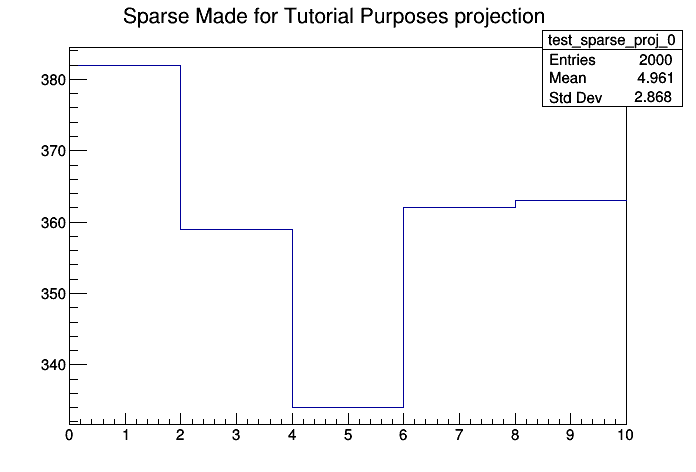

In [8]:
# We can project onto a single axis to see what any one of the distributions looks like by itself!
test_sparse_axis_0 = test_sparse.Projection(0)
test_sparse_axis_0.Draw()
canvas.Draw()

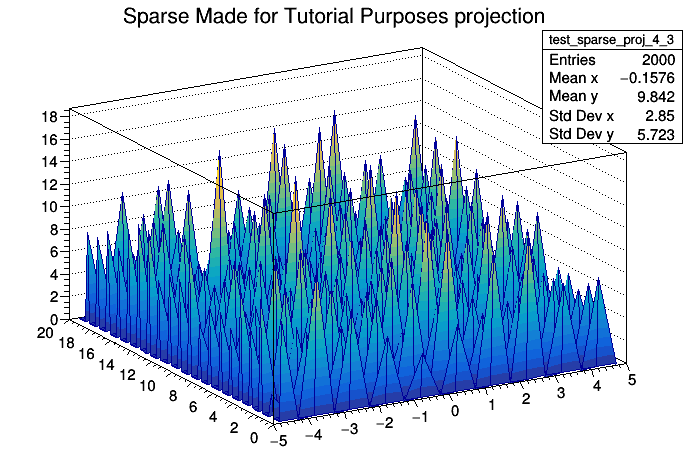

In [9]:
# We can also project onto multiple axes to create TH2Ds/TH3Ds!
test_sparse_axis_2_4 = test_sparse.Projection(3, 4)
test_sparse_axis_2_4.Draw("SURF1")
canvas.Draw()

#### As mentioned before, we want to see how changing the ranges of the axes affects whatever distribution we're interested in. Here's a simple example, but check out my other notebook for an actual analysis-based example:

In [11]:
# Let's adjust the ranges of axes 1 and 2 to see how it affects our axis 0 distribution
test_sparse.GetAxis(1).SetRangeUser(0, 1)
test_sparse.GetAxis(2).SetRangeUser(-1, 0)

# The function "SetRangeUser(a, b)" sets the range of that axis from VALUE a to VALUE b 
# (unlike SetRange(a, b), which sets the range of that axis from BIN a to BIN b)

Warning in <TROOT::Append>: Replacing existing TH1: test_sparse_proj_0 (Potential memory leak).


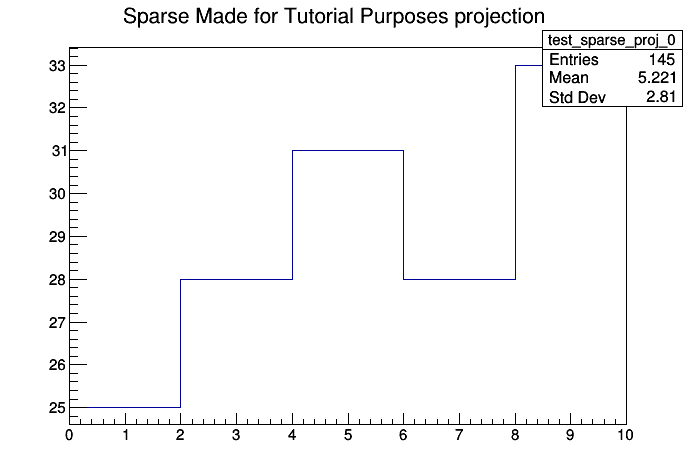

In [14]:
test_sparse_axis_0 = test_sparse.Projection(0)
test_sparse_axis_0.Draw()
canvas.Draw()

#### As you can see, this distribution looks different!! As we just filled our sparse with uncorrelated random integers, it's not a very interesting exercise, so I highly recommend checking out my PID notebook! 